In [1]:
from sage.all import sigma, nth_prime
nth_prime(340)

2287

In [2]:
from sage.all import sigma, nth_prime
from sage.arith.all import moebius
import pickle
import ast
from sage.all import *
from sage.combinat.partition import number_of_partitions as partition_number

ppn_list =[] 
for k in range(1, 400):
    ppn_list.append([k,partition_number(nth_prime(k))])
    if k%100==0:
        print("k:",k)

with open('/Users/barrybrent/data/run18oct25ppn1.txt', 'wb') as wfile:
    pickle.dump(ppn_list, wfile) #output snipped

with open('/Users/barrybrent/data/run18oct25ppn1.txt', 'rb') as rfile:
    ppn_list = pickle.load(rfile)
    
h_list=[[0,1]]+ppn_list 
j_list=[(0,0)] 
for n in [1..350]:# so j(1) = 1 = h(0) as required.
    sm=0
    for r in [1..n-1]: 
        sm=sm+j_list[r][1]*h_list[n-r][1] 
    j_n=n*h_list[n][1]-sm
    j_list.append((n,j_n))
    if n%50==0:
        print("n:",n)

print(h_list[:10])
print()
print(j_list[:10])
    
with open('/Users/barrybrent/data/run18oct25ppn2.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile) # ouput snipped

k: 100
k: 200
k: 300
n: 50
n: 100
n: 150
n: 200
n: 250
n: 300
n: 350
[[0, 1], [1, 2], [2, 3], [3, 7], [4, 15], [5, 56], [6, 101], [7, 297], [8, 490], [9, 1255]]

[(0, 0), (1, 2), (2, 2), (3, 11), (4, 18), (5, 167), (6, -1), (7, 975), (8, -878), (9, 3935)]


PARI stack size set to 7000000000 bytes, maximum size set to 7000002560
----------------------------------------------------------------------------------------------------
(1, 1760841730.582001)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(2, 1760841730.583694)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(3, 1760841730.584915)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(4, 1760841730.586294)
PERIODIC BEHAVIOR 

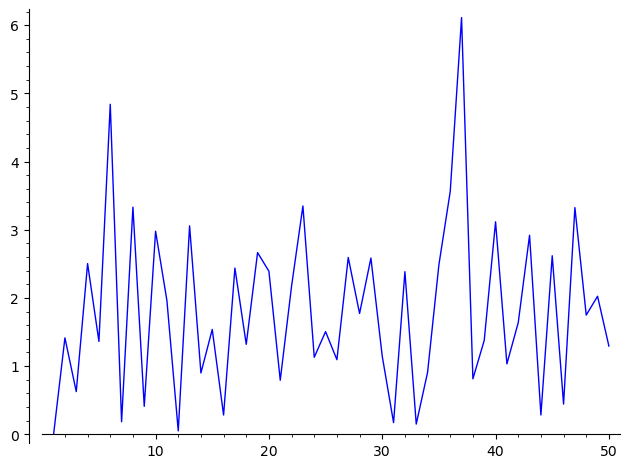

LOGS MINIMUM MODULI


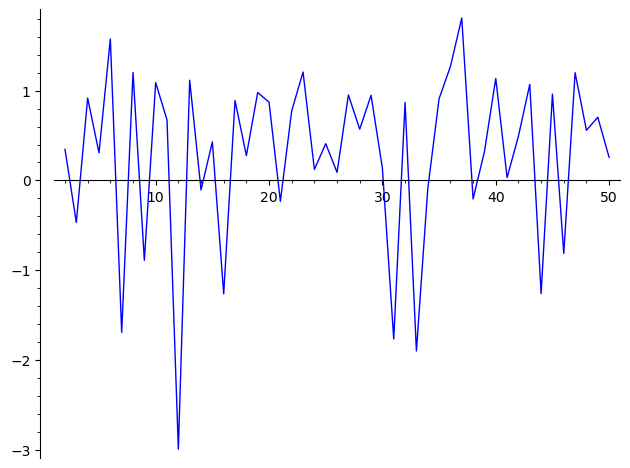

minimum logarithm of minimum modulus: -2.9960486807617706336875723483
MAXIMUM MODULI


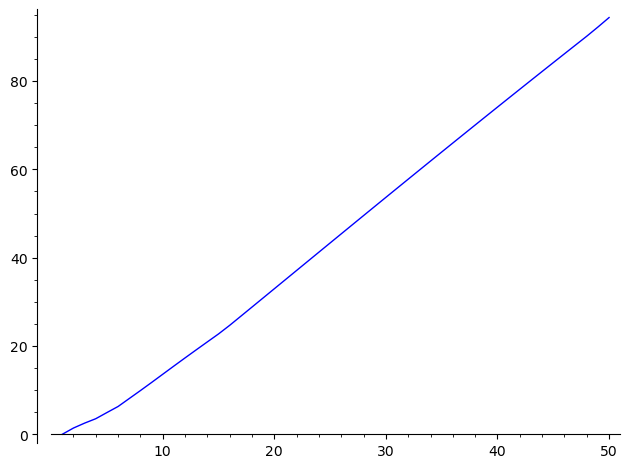

PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(51, 1760841733.2525408)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(52, 1760841733.442403)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(53, 1760841733.6436648)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
-----------------------------------------------------------------------

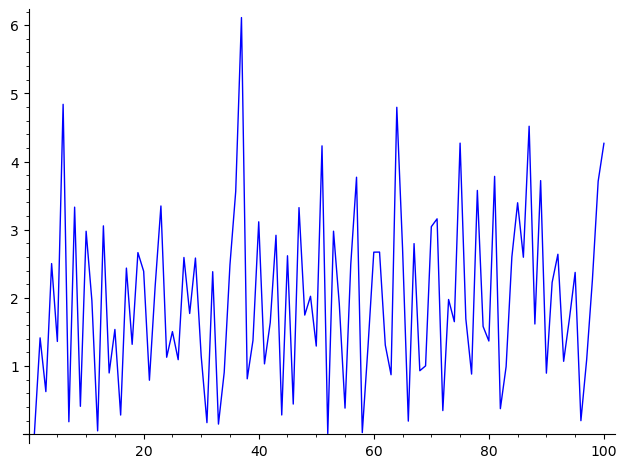

LOGS MINIMUM MODULI


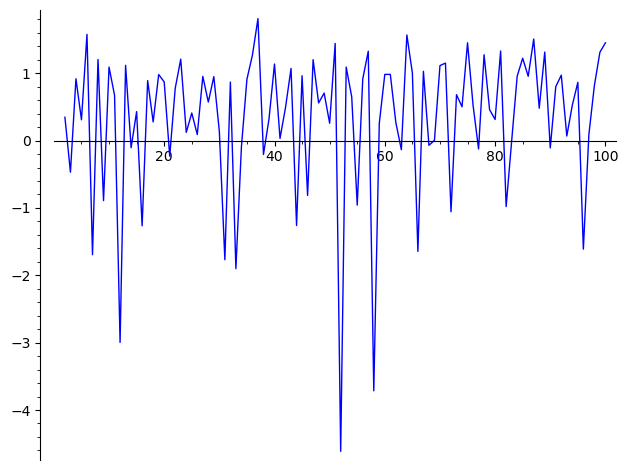

minimum logarithm of minimum modulus: -4.6137441938678669351327032533
MAXIMUM MODULI


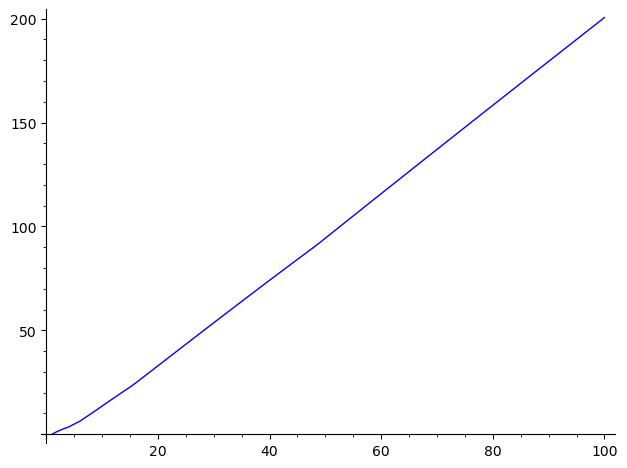

PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(101, 1760841766.7381382)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(102, 1760841768.446621)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(103, 1760841770.166123)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
---------------------------------------------------------------------

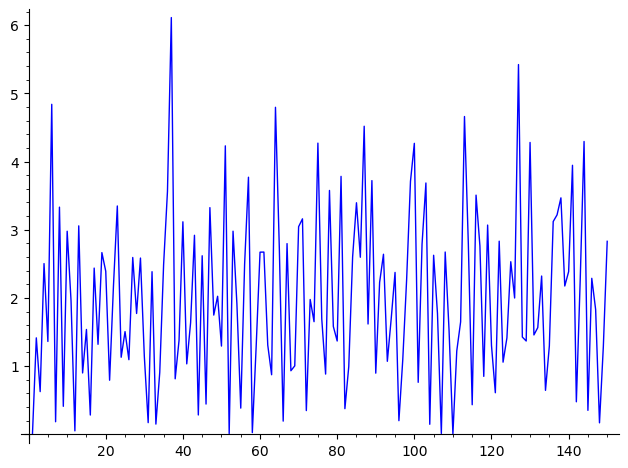

LOGS MINIMUM MODULI


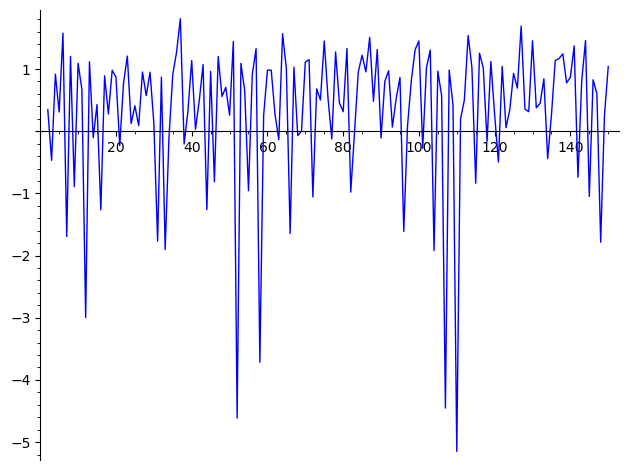

minimum logarithm of minimum modulus: -5.1486395775123877412139300557
MAXIMUM MODULI


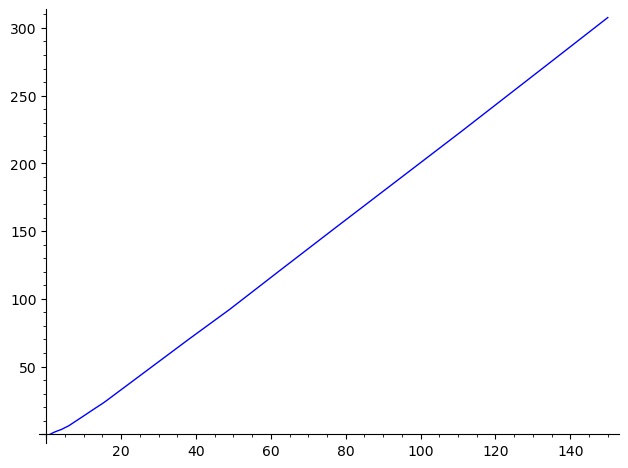

PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(151, 1760841935.93398)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(152, 1760841942.7220411)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------------------------------------
(153, 1760841949.296233)
PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected
----------------------------------------------------------------------

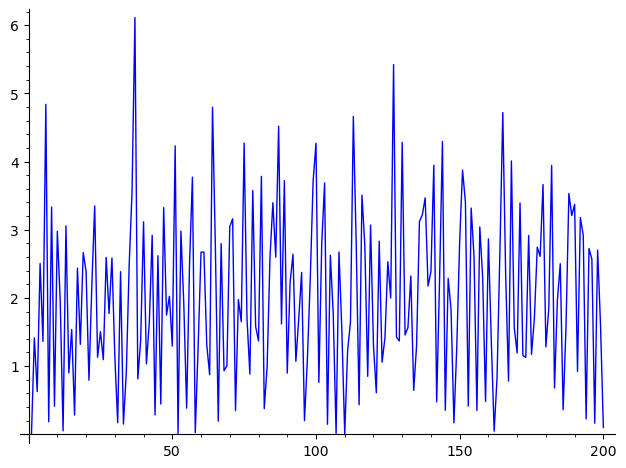

LOGS MINIMUM MODULI


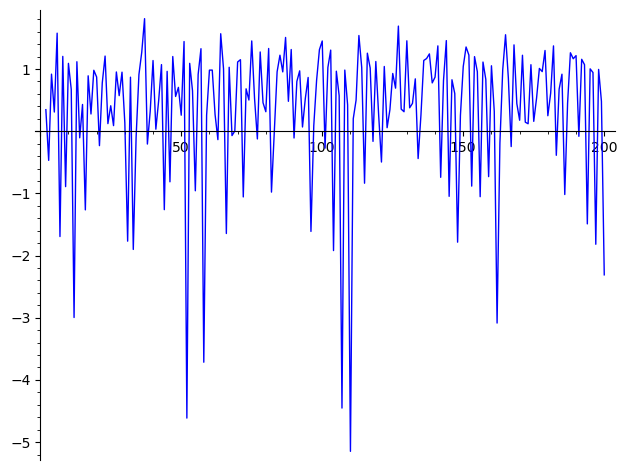

minimum logarithm of minimum modulus: -5.1486395775123877412139300557
MAXIMUM MODULI


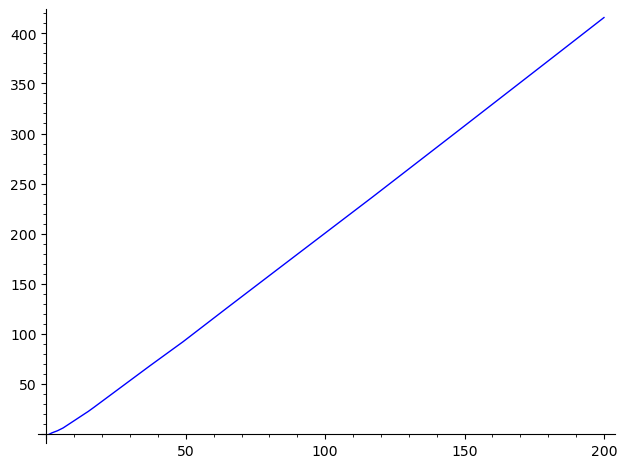

PERIODIC BEHAVIOR ANALYSIS RESULTS
(Rejecting: score < 0.300000000000000 or period > 100)

ANALYSIS COMPLETE: 0 valid results, 0 rejected


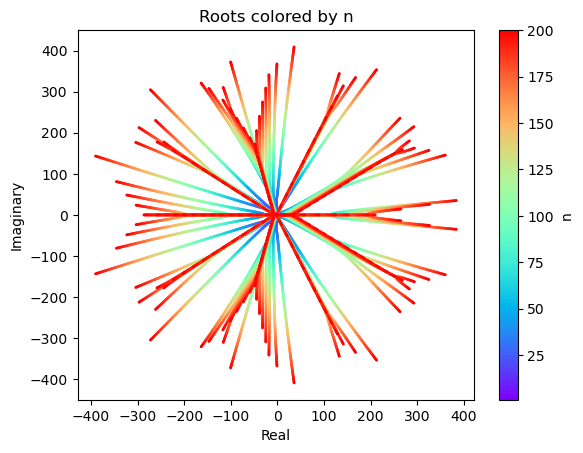

In [5]:
import pickle
from sage.all import sigma, nth_prime
import ast
import time

# Increase PARI stack size to handle large polynomial root computations
pari.allocatemem(7*10^9)  # Allocate 7GB for PARI stack


def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()

def periodic_behavior_score(main_local_minima_list, min_score=0.3, max_period=100):
    """
    Analyzes periodic behavior for all v values in main_local_minima_list.
    Uses autocorrelation and FFT to detect ANY periodic pattern (not just sine waves).
    Filters out results with weak periodicity or unreasonably large periods.
    
    Args:
        main_local_minima_list: List of tuples [(v1, points1), (v2, points2), ...]
                                where points are [(x1, y1), (x2, y2), ...]
        min_score: Minimum periodicity score to accept (default: 0.3)
        max_period: Maximum allowed period (default: 100). Results with larger periods are rejected.
    
    Returns:
        results: List of tuples [(v, score, info_dict), ...] for valid results only
    """
    
    results = []
    rejected = []
    
    print("=" * 80)
    print("PERIODIC BEHAVIOR ANALYSIS RESULTS")
    print(f"(Rejecting: score < {min_score} or period > {max_period})")
    print("=" * 80)
    
    for points in mins_list:
        if len(points) < 4:
            continue
        
        # Extract x and y coordinates, converting to plain floats
        x_data = np.array([float(p[0]) for p in points])
        y_data = np.array([float(p[1]) for p in points])
        
        # Remove mean (detrend)
        y_detrended = y_data - np.mean(y_data)
        
        # --- Method 1: Autocorrelation Analysis ---
        autocorr = correlate(y_detrended, y_detrended, mode='full')
        autocorr = autocorr[len(autocorr)//2:]
        autocorr = autocorr / autocorr[0]  # Normalize
        
        # Find peaks in autocorrelation (excluding the first peak at lag=0)
        peaks, properties = find_peaks(autocorr[1:], prominence=0.1, distance=3)
        peaks = peaks + 1  # Adjust for excluding first element
        
        # Calculate periodicity score from autocorrelation
        if len(peaks) > 0:
            autocorr_score = autocorr[peaks[0]] if peaks[0] < len(autocorr) else 0
            spacing = np.mean(np.diff(x_data))
            autocorr_period = peaks[0] * spacing
        else:
            autocorr_score = 0
            autocorr_period = None
        
        # --- Method 2: FFT Analysis ---
        n = len(y_detrended)
        yf = fft(y_detrended)
        spacing = np.mean(np.diff(x_data))
        xf = fftfreq(n, spacing)[:n//2]
        power = 2.0/n * np.abs(yf[:n//2])
        
        if len(power) > 1:
            dominant_freq_idx = np.argmax(power[1:]) + 1
            dominant_freq = xf[dominant_freq_idx]
            fft_period = 1/dominant_freq if dominant_freq > 0 else None
            
            # FFT score: ratio of dominant peak to mean power
            mean_power = np.mean(power[1:])
            fft_score = power[dominant_freq_idx] / mean_power if mean_power > 0 else 0
            fft_score = min(fft_score / 10, 1.0)  # Normalize to 0-1 range
        else:
            fft_period = None
            fft_score = 0
            dominant_freq = 0
        
        # --- Combined Score ---
        combined_score = (autocorr_score + fft_score) / 2
        
        # Determine best period estimate
        if autocorr_period and fft_period:
            # Use autocorr period if both are available and similar
            if abs(autocorr_period - fft_period) / max(autocorr_period, fft_period) < 0.3:
                best_period = autocorr_period
                period_confidence = "high"
            else:
                # Use the one with higher score
                best_period = autocorr_period if autocorr_score > fft_score else fft_period
                period_confidence = "moderate"
        elif autocorr_period:
            best_period = autocorr_period
            period_confidence = "moderate"
        elif fft_period:
            best_period = fft_period
            period_confidence = "low"
        else:
            best_period = None
            period_confidence = "none"
        
        # Check rejection criteria
        rejection_reason = None
        if combined_score < min_score:
            rejection_reason = f"score = {combined_score:.3f} (too low)"
        elif best_period and best_period > max_period:
            rejection_reason = f"period = {best_period:.2f} (too large)"
        
        if rejection_reason:
            print(f"\nREJECTED v = {v}: {rejection_reason}")
            print(f"  ({len(peaks)} autocorrelation peaks found)")
            rejected.append((v, combined_score, best_period))
            continue
        
        # Package results
        info_dict = {
            'combined_score': combined_score,
            'autocorr_score': autocorr_score,
            'autocorr_period': autocorr_period,
            'autocorr_peaks': len(peaks),
            'fft_score': fft_score,
            'fft_period': fft_period,
            'dominant_frequency': dominant_freq,
            'best_period': best_period,
            'period_confidence': period_confidence
        }
        
        results.append((v, combined_score, info_dict))
        
        print(f"\nAnalyzing v = {v}:")
        print(f"  Autocorrelation peaks found: {len(peaks)}")
        print(f"  Combined periodicity score = {combined_score:.6f}")
        print(f"  Best period estimate = {best_period:.4f} (confidence: {period_confidence})")
        print(f"  Autocorrelation: score = {autocorr_score:.4f}, period = {(autocorr_period if autocorr_period else 0):.4f}")
        print(f"  FFT: score = {fft_score:.4f}, period = {(fft_period if fft_period else 0):.4f}")
        print(f"  Dominant frequency = {dominant_freq:.6f}")
    
    print("\n" + "=" * 80)
    print(f"ANALYSIS COMPLETE: {len(results)} valid results, {len(rejected)} rejected")
    print("=" * 80)
    
    return results
with open('/Users/barrybrent/data/run18oct25ppn2.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)
from sage.all import *
precision_bits = 100
CC = ComplexField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
centers_list=[]
max_diameter_list=[]
mins_list=[]
log_mins_list=[]
maxes_list=[]
log_maxes_list=[]
dets=[]
tests=[]
for n in range(1, 201):
    print("----------------------------------------------------------------------------------------------------")
    deformed_j_list=j_list[:n]
    inputs=[pair[1] for pair in deformed_j_list]
    pl=P_matrix(inputs) ### DEFORMED
    det=pl.det()
    print((n,time.time()))
    dets.append((n,det))
    matrix_list+=[(n,pl)]
    cp=pl.charpoly()
    charpol_list+=[(n,cp)]
    roots = cp.roots(ring=CC, multiplicities=False)       
    roots_list+=[(n,roots)]
    pairs = [(z.real(), z.imag()) for z in roots]
    aar = [r.abs() for r in roots]
    aar_list+=[(n,aar)]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)  
        mins_list+=[(n,minn)]
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
            log_mins_list.append((n,log_minn))
        maxx = max(aar)  
        maxes_list.append((n,maxx))
        
    if n%50==0:
        p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
        print("MINIMUM MODULI")
        p.show()
        p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
        print("LOGS MINIMUM MODULI")
        p.show()
        mml=[pair[1] for pair in log_mins_list]
        print("minimum logarithm of minimum modulus:",min(mml))
        p = list_plot(maxes_list, plotjoined=True, axes_labels=['', ''])
        print("MAXIMUM MODULI")
        p.show()
    results = periodic_behavior_score(mins_list, min_score=0.3, max_period=100)

with open('/Users/barrybrent/data/run18oct25ppn8.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile) #output snipped

with open('/Users/barrybrent/data/run18oct25ppn9.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile) #output snipped

with open('/Users/barrybrent/data/run18oct25ppn10.txt', 'wb') as wfile:
    pickle.dump(dets, wfile) #output snipped
    
with open('/Users/barrybrent/data/run18oct25ppn11.txt', 'wb') as wfile:
    pickle.dump(log_mins_list, wfile) #output snipped

with open('/Users/barrybrent/data/run18oct25ppn12.txt', 'wb') as wfile:
    pickle.dump(maxes_list, wfile) #output snipped

from sage.plot.colors import rainbow
import matplotlib.pyplot as plt

n_values = [n for n, roots in roots_list]
n_min, n_max = min(n_values), max(n_values)
colors = rainbow(len(n_values))

# Collect all points with their n values for matplotlib
all_points = []
all_n_values = []
for n, roots in roots_list:
    for z in roots:
        all_points.append((float(z.real()), float(z.imag())))
        all_n_values.append(n)

# Use matplotlib for better color mapping
real_parts = [p[0] for p in all_points]
imag_parts = [p[1] for p in all_points]

plt.scatter(real_parts, imag_parts, c=all_n_values, cmap='rainbow', s=1)
plt.colorbar(label='n')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Roots colored by n')
plt.show()